In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample # module for resampling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier

import statistics
import math
import time
from datetime import datetime

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
#read in the csv
MY_PATH = "./datasets/training_dataset_V3.csv"
data = pd.read_csv(MY_PATH)

# Take a look at the data

In [3]:
data.head()

,Unnamed: 0,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,...,most_recent_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
0,0,2019-12-16,Monday,2019,21350,U0109015,Owner Operator,CA&F TRUCKING,Maywood,CA,...,2021-02-17,2019-12-16,2,0,438,438,0,45,45,483
1,1,2021-01-15,Friday,2021,36437,C0097727,Fleet,New opportunities inc,Los Angeles,CA,...,2021-02-03,2021-01-15,1,2,72,74,0,1,1,75
2,2,2019-12-26,Thursday,2019,19323,U0107081,Owner Operator,RAS,Compton,CA,...,2020-09-25,2019-12-26,1,0,180,180,0,2,2,182
3,3,2021-02-10,Wednesday,2021,34809,C0094651,Fleet,NFS asset Drayage,Lynwood,CA,...,2021-02-17,2021-02-10,3,0,0,0,0,0,0,62
4,4,2017-07-24,Monday,2017,4728,U0094376,Owner Operator,joes transportation,Norco,CA,...,2017-10-11,2017-07-24,2,57,0,57,314,0,314,371


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83414 entries, 0 to 83413
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                83414 non-null  int64  
 1   dt                        83414 non-null  object 
 2   weekday                   83414 non-null  object 
 3   year                      83414 non-null  int64  
 4   id_driver                 83414 non-null  int64  
 5   id_carrier_number         83414 non-null  object 
 6   dim_carrier_type          83414 non-null  object 
 7   dim_carrier_company_name  83365 non-null  object 
 8   home_base_city            83369 non-null  object 
 9   home_base_state           83369 non-null  object 
 10  carrier_trucks            83414 non-null  object 
 11  num_trucks                83344 non-null  float64
 12  interested_in_drayage     83414 non-null  object 
 13  port_qualified            83414 non-null  object 
 14  signup

In [5]:
data.describe()

,Unnamed: 0,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
count,83414.000000,83414.000000,83414.000000,83344.000000,71124.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000
mean,41706.500000,2018.960930,18222.414954,22.582921,298.752489,2.076270,29.477762,71.579675,101.057436,148.258422,13.073021,161.331443,266.502661
std,24079.692014,1.359343,11667.704926,48.829719,390.345107,2.672163,88.171940,194.532776,214.502147,415.978060,42.241592,413.792137,448.806175
min,0.000000,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20853.250000,2018.000000,7890.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,37.000000
50%,41706.500000,2019.000000,16299.000000,4.000000,61.000000,1.000000,2.000000,0.000000,13.000000,15.000000,0.000000,37.000000,110.000000
75%,62559.750000,2020.000000,28974.000000,14.000000,497.000000,2.000000,23.000000,18.000000,94.000000,112.000000,1.000000,135.000000,325.000000
max,83413.000000,2021.000000,38125.000000,195.000000,1653.000000,129.000000,902.000000,1324.000000,1348.000000,4266.000000,371.000000,4266.000000,4266.000000


In [6]:
# Drop extra column

data = data.drop(labels=['Unnamed: 0'], axis=1)
data.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,most_recent_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
0,2019-12-16,Monday,2019,21350,U0109015,Owner Operator,CA&F TRUCKING,Maywood,CA,"[""poweronly""]",...,2021-02-17,2019-12-16,2,0,438,438,0,45,45,483
1,2021-01-15,Friday,2021,36437,C0097727,Fleet,New opportunities inc,Los Angeles,CA,"[""poweronly"", ""boxtruck""]",...,2021-02-03,2021-01-15,1,2,72,74,0,1,1,75
2,2019-12-26,Thursday,2019,19323,U0107081,Owner Operator,RAS,Compton,CA,"[""poweronly""]",...,2020-09-25,2019-12-26,1,0,180,180,0,2,2,182
3,2021-02-10,Wednesday,2021,34809,C0094651,Fleet,NFS asset Drayage,Lynwood,CA,"[""poweronly"", ""dryvan""]",...,2021-02-17,2021-02-10,3,0,0,0,0,0,0,62
4,2017-07-24,Monday,2017,4728,U0094376,Owner Operator,joes transportation,Norco,CA,"[""dryvan""]",...,2017-10-11,2017-07-24,2,57,0,57,314,0,314,371


# Part 1: Generate labels
## drivers in the 75th percentile of ‘loads’ and the 75th percentile of ‘most_recent_load_date’ are assigned a label of 1 (indicating a high performing driver) with all others being assigned a 0 - (NOTE: your labels will likely be unbalanced. 

### pre-work from Piazza that must be done

- collapse your rows by trimming any duplicative entries per-driver, and only leaving the most recent (and therefore cumulative with regards to features like loads) entry. 
- Thereby each row is it's own driver, and it more closely fits the desired model. 
- If you take this approach, it would be worth playing around with different augmentations to provide additional nuance to your data. (e.g., while you have a total count of loads, you don't have a clear indication of the distribution of those loads. Is this an older driver who was active several years ago but now works irregularly, or is this a new driver that's been very active in the last few months?) Boiling up that kind of data into your features could be incredibly powerful.

In [7]:
def preprocess_data(dataset, testing=False):

    #for each duplicate of a driver id 'id_driver', cumulate the 'load' values for this driver 
    #AND add the median load for this driver as a new column 'median_load'

    drivers = list(set(dataset['id_driver'])) #get rid of duplicates
    rows_to_keep = []
    median_loads = []

    for d in drivers:
        loads_for_driver = dataset.loc[dataset['id_driver'] == d]
        
        most_recent_date = ""
        
        if testing:
            dates = list(dataset.loc[dataset['id_driver'] == d]['dt'])
            dates.sort(reverse=True)
            most_recent_date = dates[0]
        else:
            most_recent_date = list(loads_for_driver['most_recent_load_date'])[0]

        loads = sum(loads_for_driver['loads'])
        median_load = statistics.median(list(loads_for_driver['loads']))

        row = loads_for_driver.loc[loads_for_driver['dt'] == most_recent_date]
        if row.empty:
            dates = list(dataset.loc[dataset['id_driver'] == d]['dt'])
            dates.sort(reverse=True)
            next_recent_date = dates[0]
            row = loads_for_driver.loc[loads_for_driver['dt'] == next_recent_date]
        
        row['median_load'] = median_load
        row['loads'] = loads
        
        if len(row) > 1:
            row = row.head(1)

        rows_to_keep.append(row)
        
    #create new dataframe with unique drivers
    unique_data = pd.concat(rows_to_keep)
    print("rows to keep:", len(rows_to_keep))
    print("rows in unique_data:", len(unique_data))
    
    return unique_data


In [8]:
# DF with one row per driver, created from rows_to_keep -- ISSUE somehow goes from 5288 -> 5255

condensed_data = preprocess_data(data)
condensed_data.head()

# condensed_data = pd.concat(rows_to_keep)
# print("rows to keep:", len(rows_to_keep))
# print("rows in condensed_data:", len(condensed_data))
# condensed_data.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


rows to keep: 5291
rows in unique_data: 5291


,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads,median_load
79771,2016-06-20,Monday,2016,20,U0000035,Owner Operator,Mega Fleet Corp,Pasadena,CA,"[""dryvan""]",...,2016-06-20,42,0,0,0,42,0,42,42,1.0
20681,2015-10-29,Thursday,2015,26,U0000041,Owner Operator,NaN,"Sierra Madre,",CA,"[""dryvan""]",...,2015-10-29,1,0,0,0,1,0,1,1,1.0
44537,2015-12-09,Wednesday,2015,27,U0000042,Owner Operator,NaN,"Sierra Madre,",CA,"[""dryvan""]",...,2015-12-09,11,0,0,0,11,0,11,11,1.0
842,2018-12-05,Wednesday,2018,30,U0000045,Owner Operator,A & J Transport,Riverside,CA,"[""reefer""]",...,2018-12-05,4,0,0,0,4,0,4,4,1.0
31360,2016-04-01,Friday,2016,31,U0000046,Owner Operator,lv transportation llc,NaN,NaN,"[""dryvan""]",...,2016-04-01,15,0,0,0,15,0,15,15,1.0


In [9]:
condensed_data.describe()

,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads,median_load
count,5291.000000,5291.000000,5249.000000,3962.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000
mean,2018.713287,17732.979021,16.876738,290.466683,32.732943,4.708373,9.245700,13.954073,15.129843,2.383859,17.513703,33.090531,1.257985
std,1.435313,11626.271221,40.991376,368.131519,123.231067,20.699292,59.876237,64.959440,99.420723,17.742057,100.785015,124.359999,1.423729
min,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2018.000000,8061.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2019.000000,15220.000000,4.000000,108.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000
75%,2020.000000,29290.500000,11.000000,488.000000,17.000000,2.000000,0.000000,4.000000,4.000000,0.000000,5.000000,17.000000,1.000000
max,2021.000000,38125.000000,195.000000,1653.000000,4266.000000,902.000000,1324.000000,1348.000000,4266.000000,371.000000,4266.000000,4266.000000,80.000000


In [10]:
condensed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5291 entries, 79771 to 77243
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dt                        5291 non-null   object 
 1   weekday                   5291 non-null   object 
 2   year                      5291 non-null   int64  
 3   id_driver                 5291 non-null   int64  
 4   id_carrier_number         5291 non-null   object 
 5   dim_carrier_type          5291 non-null   object 
 6   dim_carrier_company_name  5284 non-null   object 
 7   home_base_city            5279 non-null   object 
 8   home_base_state           5279 non-null   object 
 9   carrier_trucks            5291 non-null   object 
 10  num_trucks                5249 non-null   float64
 11  interested_in_drayage     5291 non-null   object 
 12  port_qualified            5291 non-null   object 
 13  signup_source             5291 non-null   object 
 14  ts_

In [11]:
# compute the 75th percentile for total loads 
# (piazza @222 says to use 75th percentile from whole dataset before dropping duplicates)
load_percentile = data["total_loads"].quantile(0.75)
print("75th percentile of total_loads for full dataset:", load_percentile)

75th percentile of total_loads for full dataset: 325.0


In [12]:
# convert date to date object 
data.most_recent_load_date = [pd.to_datetime(d) for d in data.most_recent_load_date]
condensed_data.most_recent_load_date = [pd.to_datetime(d) for d in condensed_data.most_recent_load_date]

# calculate 75th percentile for most_recent_load_date in full dataset 
date_percentile = data["most_recent_load_date"].quantile(0.75)
print("75th percentile of most_recent_load_date for full dataset:", date_percentile)

75th percentile of most_recent_load_date for full dataset: 2021-02-14 00:00:00


In [13]:
# create a new column and use np.where to assign values based on most_recent_load_date and total_loads
condensed_data["high_performing"] = np.where((condensed_data["most_recent_load_date"] >= date_percentile) 
                                             & (condensed_data["total_loads"] >= load_percentile), 1, 0)

n_high_performers = len(condensed_data.loc[condensed_data["high_performing"] == 1])
n_non_high_performers = len(condensed_data.loc[condensed_data["high_performing"] == 0])


print("high performing drivers:", n_high_performers)
print("low performing drivers:", n_non_high_performers)

high performing drivers: 55
low performing drivers: 5236


## Balance data

In [14]:
# balancing data by upsampling the high-performing drivers
majority = condensed_data[condensed_data["high_performing"] == 0]
minority = condensed_data[condensed_data["high_performing"] == 1]

# want to sample high-performers with replacement to match the number of non-high performing drivers
minority_upsampled = resample(minority, replace=True, n_samples=n_non_high_performers, random_state=42)
upsampled_data = pd.concat([majority, minority_upsampled])
upsampled_data["high_performing"].value_counts()

1    5236
0    5236
Name: high_performing, dtype: int64

# Step 2: Drop ‘load’ and ‘most_recent_load_date’ from your data frame 
Since those fields are
being directly used to label your data please remove them from your training and
testing cohorts.

In [15]:
# condensed_data = condensed_data.drop(labels=['total_loads', 'most_recent_load_date'], axis=1)
# condensed_data.info()

upsampled_data

upsampled_data = upsampled_data.drop(labels=['total_loads', 'most_recent_load_date'], axis=1)
upsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10472 entries, 79771 to 65379
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dt                        10472 non-null  object 
 1   weekday                   10472 non-null  object 
 2   year                      10472 non-null  int64  
 3   id_driver                 10472 non-null  int64  
 4   id_carrier_number         10472 non-null  object 
 5   dim_carrier_type          10472 non-null  object 
 6   dim_carrier_company_name  10465 non-null  object 
 7   home_base_city            10460 non-null  object 
 8   home_base_state           10460 non-null  object 
 9   carrier_trucks            10472 non-null  object 
 10  num_trucks                10430 non-null  float64
 11  interested_in_drayage     10472 non-null  object 
 12  port_qualified            10472 non-null  object 
 13  signup_source             10472 non-null  object 
 14  ts

# 3. Run some basic statistics on your variables including correlations with labels and report findings 

1    5236
0    5236
Name: high_performing, dtype: int64


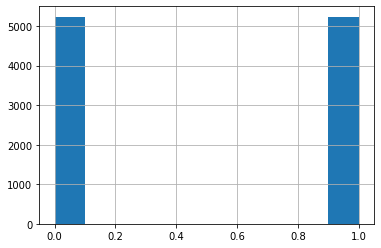

In [16]:
print(upsampled_data['high_performing'].value_counts())
upsampled_data['high_performing'].hist()
plt.show()

In [17]:
upsampled_data.describe()

,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,median_load,high_performing
count,10472.000000,10472.000000,10430.000000,8846.000000,10472.000000,10472.000000,10472.000000,10472.000000,10472.000000,10472.000000,10472.000000,10472.000000,10472.000000
mean,2019.844633,21945.638846,9.918025,174.848519,360.680386,20.764992,172.329259,193.094251,140.357238,30.300420,170.657659,2.536526,0.500000
std,1.532328,11389.251420,30.114148,307.120463,580.272177,70.797654,285.062121,292.970411,539.364741,62.735199,535.290665,2.587662,0.500024
min,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2019.000000,12811.500000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,2021.000000,22194.000000,1.000000,2.000000,318.000000,0.000000,0.000000,6.000000,1.000000,0.000000,20.000000,1.000000,0.500000
75%,2021.000000,33054.000000,6.000000,248.000000,504.000000,3.000000,331.000000,355.000000,10.000000,34.000000,143.000000,4.000000,1.000000
max,2021.000000,38125.000000,195.000000,1653.000000,4266.000000,902.000000,1324.000000,1348.000000,4266.000000,371.000000,4266.000000,80.000000,1.000000


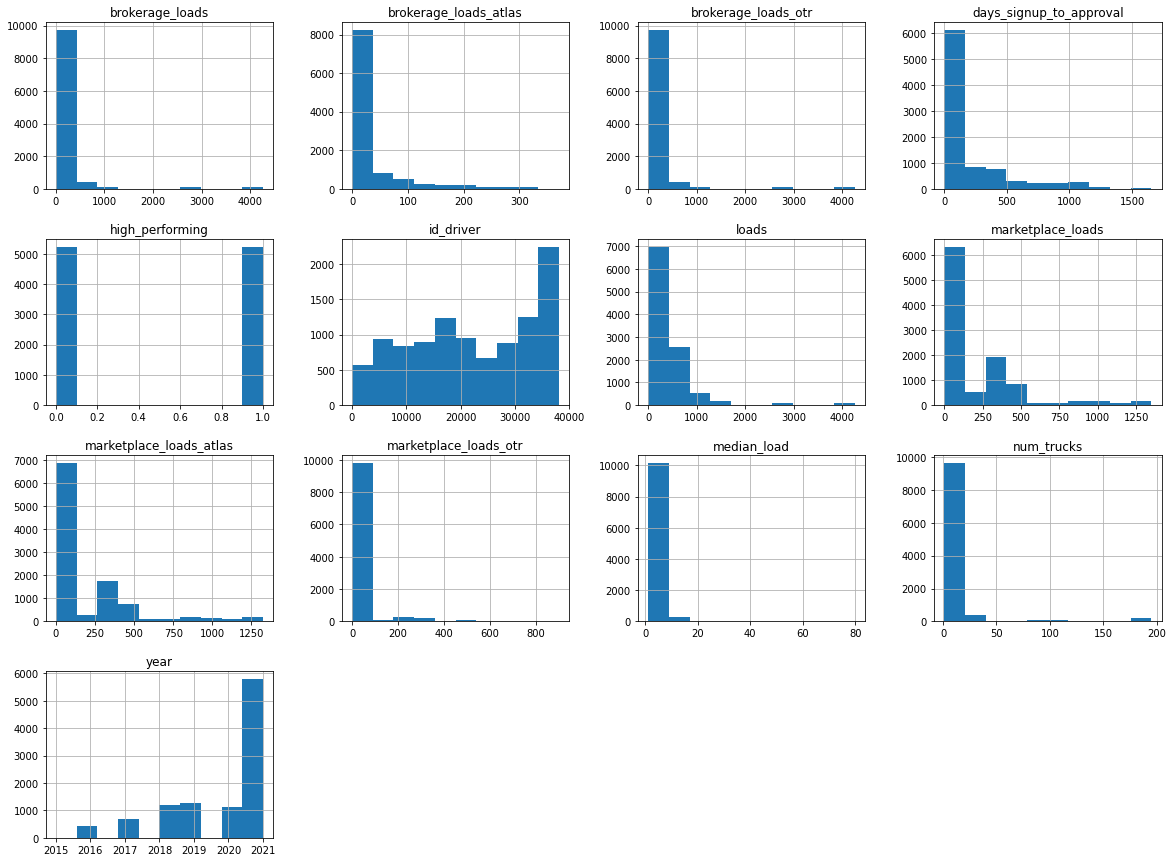

In [18]:
upsampled_data.hist(figsize=(20,15))
plt.show()

In [19]:
corr_matrix = upsampled_data.corr()
corr_matrix

,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,median_load,high_performing
year,1.000000,0.675744,-0.048957,-0.574998,0.449587,0.193640,0.453663,0.488211,0.180562,0.361957,0.224357,0.397888,0.754030
id_driver,0.675744,1.000000,0.033008,-0.701328,0.113522,-0.090798,0.327337,0.296559,-0.081994,0.356470,-0.040840,0.420951,0.377816
num_trucks,-0.048957,0.033008,1.000000,0.039872,-0.061832,-0.064785,-0.160311,-0.171670,0.029319,-0.116512,0.015893,-0.096463,-0.235084
days_signup_to_approval,-0.574998,-0.701328,0.039872,1.000000,-0.220295,-0.042040,-0.268024,-0.272935,-0.049454,-0.231263,-0.080697,-0.288165,-0.342959
loads,0.449587,0.113522,-0.061832,-0.220295,1.000000,0.112700,0.390926,0.407608,0.840802,0.181903,0.868520,0.419407,0.576959
marketplace_loads_otr,0.193640,-0.090798,-0.064785,-0.042040,0.112700,1.000000,-0.010927,0.231022,0.007906,-0.085633,-0.002070,-0.124676,0.231701
marketplace_loads_atlas,0.453663,0.327337,-0.160311,-0.268024,0.390926,-0.010927,1.000000,0.970366,-0.147385,0.409730,-0.100488,0.344518,0.584559
marketplace_loads,0.488211,0.296559,-0.171670,-0.272935,0.407608,0.231022,0.970366,1.000000,-0.141497,0.377976,-0.098275,0.305090,0.624772
brokerage_loads_otr,0.180562,-0.081994,0.029319,-0.049454,0.840802,0.007906,-0.147385,-0.141497,1.000000,-0.122852,0.993213,0.253721,0.236702
brokerage_loads_atlas,0.361957,0.356470,-0.116512,-0.231263,0.181903,-0.085633,0.409730,0.377976,-0.122852,1.000000,-0.006589,0.292241,0.454513


In [20]:
corr_matrix["high_performing"].sort_values(ascending=False)

high_performing            1.000000
year                       0.754030
marketplace_loads          0.624772
marketplace_loads_atlas    0.584559
loads                      0.576959
median_load                0.504582
brokerage_loads_atlas      0.454513
id_driver                  0.377816
brokerage_loads            0.291772
brokerage_loads_otr        0.236702
marketplace_loads_otr      0.231701
num_trucks                -0.235084
days_signup_to_approval   -0.342959
Name: high_performing, dtype: float64

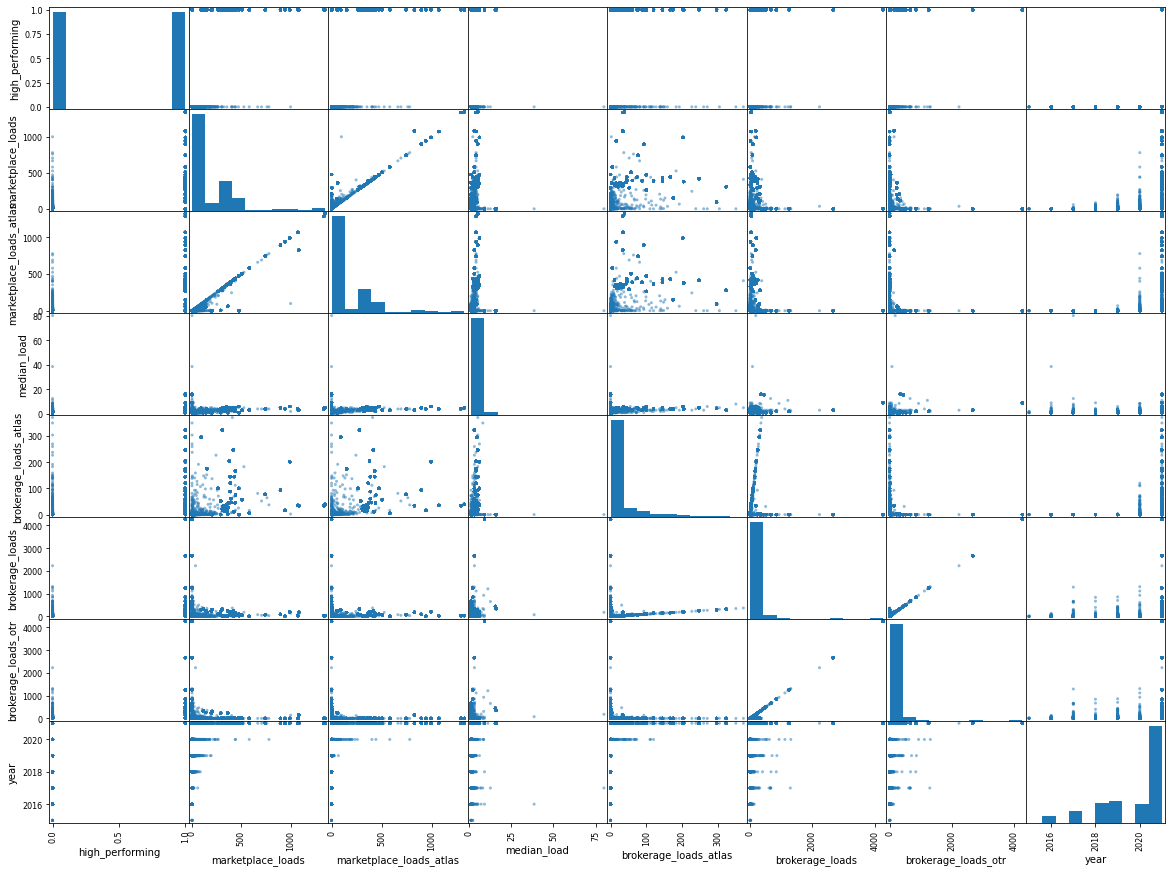

In [21]:
attributes = ["high_performing", "marketplace_loads", "marketplace_loads_atlas", "median_load",
              "brokerage_loads_atlas", 'brokerage_loads', 'brokerage_loads_otr', "year"]
scatter_matrix(upsampled_data[attributes], figsize=(20, 15))
plt.show()

### Findings: 

All of the loads-related columns are extremely right-skewed. On average, drivers have been assigned more jobs through brokers than through the NEXT marketplace. For loads assigned through brokers, they are more likely to be OTR loads than drayage jobs. The median loads that a driver carries per job is 1.

`marketplace_loads` and `marketplace_loads_atlas` have a very high correlation with `high_performing` of over 0.5 each. `brokerage_loads_atlas`, `brokerage_loads`, and `brokerage_loads_otr` also have moderate correlations with `high_performing`. `marketplace_loads` is highly correlated to `marketplace_loads_atlas` and moderately correlated to `marketplace_loads_otr`, showing some collinearity within the dataset. `brokerage_loads` is very highly correlated to `brokerage_loads_otr`. 

# 4. Create a data feature extraction plan and implement a pipeline to execute it

a. Determine which fields to retain and which to drop.

b. For those you retain, determine a categorization strategy

c. Determine an imputation strategy (you should choose more than one imputation
method depending on the specifics of your data

d. Augment at least one feature, ideally a feature cross, or non-linear transition

e. Determine a strategy for scaling features

f. Implement a single pipeline to execute this transformation

g. Document your data strategy in your report. Provide an explanation or
justification for why you chose the data you did, and also detail any experiments
you ran and the results

In [22]:
upsampled_data.isnull().sum()

dt                              0
weekday                         0
year                            0
id_driver                       0
id_carrier_number               0
dim_carrier_type                0
dim_carrier_company_name        7
home_base_city                 12
home_base_state                12
carrier_trucks                  0
num_trucks                     42
interested_in_drayage           0
port_qualified                  0
signup_source                   0
ts_signup                       0
ts_first_approved            1626
days_signup_to_approval      1626
driver_with_twic                0
dim_preferred_lanes         10278
first_load_date                 0
load_day                        0
loads                           0
marketplace_loads_otr           0
marketplace_loads_atlas         0
marketplace_loads               0
brokerage_loads_otr             0
brokerage_loads_atlas           0
brokerage_loads                 0
median_load                     0
high_performin

## Pipeline

In [23]:
unlabeled = upsampled_data.drop("high_performing", axis=1)
labels = upsampled_data["high_performing"].copy()

#### pipeline function

In [24]:
def pipeline(unlabeled):

    # drop features 
    unlabeled = unlabeled.drop(labels=['load_day',                       #redundant on dt
                                      'id_driver','id_carrier_number',    #not relevant
                                      'dim_carrier_company_name', 'home_base_city', #too many values to OHE
                                      'dim_preferred_lanes', 'ts_first_approved', 'days_signup_to_approval',  #too many null values
                                      ], axis=1) 

    #impuatation
    state_mode = str(unlabeled['home_base_state'].mode())
    unlabeled['home_base_state'] = unlabeled['home_base_state'].fillna(state_mode) # mode value - 87% are CA 

    truck_median = unlabeled['num_trucks'].median()
    unlabeled['num_trucks'] = unlabeled['num_trucks'].fillna(truck_median) # right-skewed so use median
    
    #augmentation
    unlabeled["marketplace_ratio"] = unlabeled["marketplace_loads"]/(unlabeled["marketplace_loads"]+unlabeled["brokerage_loads"])
    
    #categorization
    
    # change date representations to ints
    unlabeled['dt'] = unlabeled['dt'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
    unlabeled['ts_signup'] = unlabeled['ts_signup'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
    unlabeled['first_load_date'] = unlabeled['first_load_date'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
#     unlabeled['recent_date'] = unlabeled['recent_date'].apply(lambda d : int(pd.to_datetime(d).timestamp()))


    # group by numeric or categorical
    data_num = ['year','num_trucks', 'loads', 
                'marketplace_loads_otr', 'marketplace_loads_atlas','marketplace_loads', 
                'brokerage_loads_otr', 'brokerage_loads_atlas', 'brokerage_loads', 
                'median_load', 'dt', 'ts_signup','first_load_date']
    data_cat = ['weekday', 'dim_carrier_type','home_base_state', 'carrier_trucks', 'interested_in_drayage', 'port_qualified',
               'signup_source', 'driver_with_twic']
    
    #full pipeline
    num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
    #         ('attribs_adder', AugmentFeatures()),
            ('std_scaler', StandardScaler()),
        ])

    numerical_features = data_num
    categorical_features = data_cat

    full_pipeline = ColumnTransformer([
            ("num", num_pipeline, numerical_features),
            ("cat", OneHotEncoder(), categorical_features),
        ])

    prepared_data = full_pipeline.fit_transform(unlabeled)
    return prepared_data

    

In [25]:
prepared_data = pipeline(unlabeled)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(prepared_data, labels, test_size=0.2, random_state=10)

# 5. Implement a basic Logistic Regression - 
** piazza post corrected to logistic from linear

With your newly pipelined data, find and interpret important features (e.g. using regression and associated p-values). If there are any collinearities be careful when incorporating them into the regression.

Accuracy:    0.994749
Precision:   0.989194
Recall:      1.000000
F1 Score:    0.994568


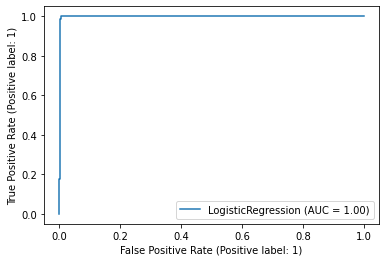

In [27]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
log_predicted = log_reg.predict(X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, log_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, log_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, log_predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, log_predicted)))

#ROC curve
metrics.plot_roc_curve(log_reg, X_test, y_test)  
plt.show()  

In [28]:
log_reg.coef_.shape

(1, 87)

### not sure how to interpret important features or p-values?? watching this piazza post https://piazza.com/class/kjdcwsz1c306g7?cid=251

# 6. PCA

We used TruncatedSVD (singular value decomposition) instead of PCA for this step because SVD works better with sparse matrices.

In [29]:
svd = TruncatedSVD(n_components=10, random_state=10)
svd.fit(X_train)
print(svd.explained_variance_ratio_)

X_train_transformed = svd.transform(X_train)
X_test_transformed = svd.transform(X_test)

[0.35188506 0.0032019  0.18835742 0.09398623 0.07812166 0.05899598
 0.04202151 0.03392028 0.0238362  0.01994893]


# 7. Ensemble Method

In [30]:
# Employ an ensemble method

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bc.fit(X_train_transformed, y_train)
bc_pred = bc.predict(X_test_transformed)


print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, bc_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, bc_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, bc_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, bc_pred)))
# BRUH

Accuracy:    1.000000
Precision:   1.000000
Recall:      1.000000
F1 Score:    1.000000


# 8. Neural Network

In [31]:
nn = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(50,50))
nn.fit(X_train_transformed, y_train)
nn_pred = nn.predict(X_test_transformed)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, nn_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, nn_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, nn_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, nn_pred)))

Accuracy:    0.999045
Precision:   0.998018
Recall:      1.000000
F1 Score:    0.999008


# 9. Cross Validation

Cross-Validate your training results - Employ K-Fold Cross-validation to your training
regimen for both ensemble and NN classifers. (Optional: employ a stratifiedshufflesplit
as well to ensure equitable distribution along a key parameter)

In [32]:
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

transformed_data = svd.transform(prepared_data)

# Ensemble
cv = KFold(n_splits=10)
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
# create model
scores = cross_val_score(bc, transformed_data, labels, scoring='accuracy', cv=cv)

# report performance
print('Accuracy: %.4f (%.3f)' % (mean(scores), std(scores)))


# NN
cv = KFold(n_splits=10)
nn = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(50,50))

# evaluate model
scores = cross_val_score(nn, transformed_data, labels, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.4f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.9967 (0.004)
Accuracy: 0.9969 (0.004)


# 10. Custom Models

### Support Vector Machine

In [33]:
svm = SVC(random_state=10) 
svm.fit(X_train_transformed, y_train)

svm_pred = svm.predict(X_test_transformed) 

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, svm_pred))) 
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, svm_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, svm_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, svm_pred)))

Accuracy:    0.995227
Precision:   0.990167
Recall:      1.000000
F1 Score:    0.995059


### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_transformed, y_train)
gnb_pred = gnb.predict(X_test_transformed)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, gnb_pred))) 
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, gnb_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, gnb_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, gnb_pred)))

Accuracy:    0.948449
Precision:   0.946375
Recall:      0.946375
F1 Score:    0.946375


# Testing

In [35]:
test_data = pd.read_csv("./datasets/score_V3.csv")

In [36]:
test_data = test_data.drop("Unnamed: 0", axis=1)
test_data.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,dim_preferred_lanes,first_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads
0,2019-09-30,Monday,2019,15857,C0093467,Fleet,AA Logistics Group Inc,Los Angeles,CA,"[""dryvan""]",...,NaN,2018-11-05,2019-09-30,1,14,0,14,168,0,168
1,2019-10-24,Thursday,2019,28620,C0096509,Fleet,OnDemand Trans,Riverside,CA,"[""dryvan""]",...,NaN,2019-09-21,2019-10-24,1,13,5,18,34,0,34
2,2019-09-03,Tuesday,2019,10694,U0099535,Owner Operator,Palencia trucking,Chino,CA,"[""dryvan""]",...,NaN,2018-04-23,2019-09-03,1,53,0,53,21,0,21
3,2019-08-07,Wednesday,2019,12198,C0092401,Fleet,Mar Vend Co Inc.,Carson,CA,"[""dryvan""]",...,California (Central)->Oregon (East)|California...,2018-08-09,2019-08-07,6,69,38,107,18,0,18
4,2018-10-31,Wednesday,2018,13222,C0092700,Fleet,FLY TRANSPORTATION INC,Monterey Park,CA,"[""dryvan""]",...,NaN,2018-08-08,2018-10-31,3,0,0,0,64,0,64


In [37]:
condensed_test_data = preprocess_data(test_data, testing=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


rows to keep: 668
rows in unique_data: 668


In [38]:
condensed_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 423 to 283
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dt                        668 non-null    object 
 1   weekday                   668 non-null    object 
 2   year                      668 non-null    int64  
 3   id_driver                 668 non-null    int64  
 4   id_carrier_number         668 non-null    object 
 5   dim_carrier_type          668 non-null    object 
 6   dim_carrier_company_name  668 non-null    object 
 7   home_base_city            668 non-null    object 
 8   home_base_state           668 non-null    object 
 9   carrier_trucks            668 non-null    object 
 10  num_trucks                668 non-null    float64
 11  interested_in_drayage     668 non-null    object 
 12  port_qualified            668 non-null    object 
 13  signup_source             668 non-null    object 
 14  ts_signu

In [76]:
#concatenate so we can train on the right dimensions

all_data = pd.concat([upsampled_data, condensed_test_data], ignore_index=True)
all_data.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,median_load,high_performing
0,2016-06-20,Monday,2016,20,U0000035,Owner Operator,Mega Fleet Corp,Pasadena,CA,"[""dryvan""]",...,2016-06-20,42,0,0,0,42,0,42,1.0,0.0
1,2015-10-29,Thursday,2015,26,U0000041,Owner Operator,NaN,"Sierra Madre,",CA,"[""dryvan""]",...,2015-10-29,1,0,0,0,1,0,1,1.0,0.0
2,2015-12-09,Wednesday,2015,27,U0000042,Owner Operator,NaN,"Sierra Madre,",CA,"[""dryvan""]",...,2015-12-09,11,0,0,0,11,0,11,1.0,0.0
3,2018-12-05,Wednesday,2018,30,U0000045,Owner Operator,A & J Transport,Riverside,CA,"[""reefer""]",...,2018-12-05,4,0,0,0,4,0,4,1.0,0.0
4,2016-04-01,Friday,2016,31,U0000046,Owner Operator,lv transportation llc,NaN,NaN,"[""dryvan""]",...,2016-04-01,15,0,0,0,15,0,15,1.0,0.0


In [77]:
#drop labels

unlabeled_all_data = all_data.drop("high_performing", axis=1)
labels_all_data = all_data["high_performing"].copy()

In [78]:
#run through pipeline
prepared_all_data = pipeline(unlabeled_all_data)

In [79]:
#split so test set is testing data only
X_train, X_test, y_train, y_test = train_test_split(prepared_all_data, labels_all_data, shuffle=False, test_size=668)

In [80]:
#reduce dimensionality

svd = TruncatedSVD(n_components=10, random_state=10)
svd.fit(X_train)
print(svd.explained_variance_ratio_)

X_train_transformed = svd.transform(X_train)
X_test_transformed = svd.transform(X_test)

[0.35021573 0.00560486 0.185032   0.09472812 0.0793868  0.05545934
 0.04337482 0.03701975 0.02376648 0.01980737]


In [81]:
#ensemble method

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bc.fit(X_train_transformed, y_train)
bc_pred = bc.predict(X_test_transformed)
bc_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [82]:
#neural net

nn = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(50,50))
nn.fit(X_train_transformed, y_train)
nn_pred = nn.predict(X_test_transformed)
nn_pred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.